In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [11]:
# Load the data
data = pd.read_csv('/Electric_Production.csv')

# Convert 'DATE' to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Create a new column to represent the days since the first observation (to treat time as a numeric variable)
data['Days'] = (data['DATE'] - data['DATE'].min()).dt.days

# Display the first few rows to ensure correct formatting
print(data.head())






        DATE    Value  Days
0 1985-01-01  72.5052     0
1 1985-01-02  70.6720     1
2 1985-01-03  62.4502     2
3 1985-01-04  57.4714     3
4 1985-01-05  55.3151     4


In [12]:
# Features (independent variable) and target (dependent variable)
X = data[['Days']]  # Use 'Days' as the feature
y = data['Value']   # 'Value' as the target


In [13]:
# Split data into training and testing (80% train, 20% test)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [14]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict on the test set
predictions = model.predict(X_test)


In [16]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 190.5972199873428
R-squared: -1.0833824858441794


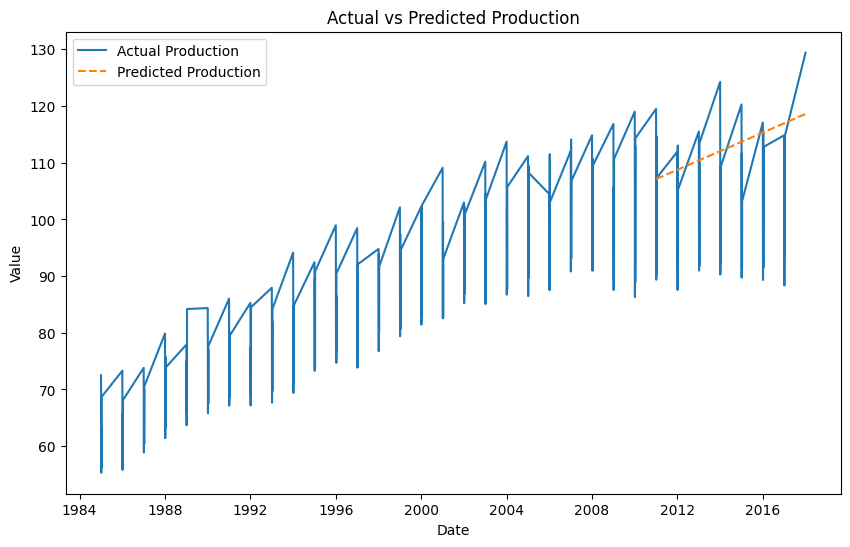

In [21]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['Value'], label='Actual Production')

# Plot the predicted values against the actual date range
# Add 'Days' back to the minimum 'DATE' in the dataset
predicted_dates = pd.to_timedelta(X_test['Days'], unit='D') + data['DATE'].min() # Convert 'Days' to Timedelta and add to minimum date
#predicted_dates = pd.to_datetime(predicted_dates, unit='D', origin=data['DATE'].min()) # This line is no longer needed

plt.plot(predicted_dates, predictions, label='Predicted Production', linestyle='--')

plt.legend()
plt.title('Actual vs Predicted Production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()